<a href="https://colab.research.google.com/github/sigolyori/my-little-projects/blob/main/Prudential_Life_Insurance_Assessment_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

prudential_life_insurance_assessment_path = kagglehub.competition_download('prudential-life-insurance-assessment')
paviiiii_underwriting_best_rf_scikitlearn_default_1_path = kagglehub.model_download('paviiiii/underwriting_best_rf/ScikitLearn/default/1')

print('Data source import complete.')


100%|██████████| 3.24M/3.24M [00:00<00:00, 121MB/s]

Extracting files...



  0%|          | 0.00/4.09M [00:00<?, ?B/s]
100%|██████████| 4.09M/4.09M [00:00<00:00, 16.7MB/s]

Data source import complete.


In [4]:
%pip install optuna.integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.5 MB/s eta 0:00:00


## 데이터 불러오기

In [15]:
!ls -al /root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/

total 3336
drwxr-xr-x 2 root root    4096 Apr  4 12:37 .
drwxr-xr-x 3 root root    4096 Apr  4 12:37 ..
-rw-r--r-- 1 root root   25483 Apr  4 12:37 sample_submission.csv.zip
-rw-r--r-- 1 root root  839141 Apr  4 12:37 test.csv.zip
-rw-r--r-- 1 root root 2538336 Apr  4 12:37 train.csv.zip


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import zipfile
import os

# 압축 파일들의 이름을 리스트로 만듭니다.
zip_files = ['/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/sample_submission.csv.zip',
             '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/test.csv.zip',
             '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/train.csv.zip']

extract_path = '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/'

# 각 zip 파일을 순회하며 압축을 풉니다.
for zip_file in zip_files:
    # 파일이 존재하는지 확인합니다.
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            print(f"'{zip_file}' 압축 해제 완료.")
    else:
        print(f"'{zip_file}' 파일을 찾을 수 없습니다.")

'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/sample_submission.csv.zip' 압축 해제 완료.
'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/test.csv.zip' 압축 해제 완료.
'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/train.csv.zip' 압축 해제 완료.


In [17]:
import pandas as pd
import os

# 압축 해제된 CSV 파일들의 경로 설정
extract_path = '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/'

train_csv = os.path.join(extract_path, 'train.csv')
test_csv = os.path.join(extract_path, 'test.csv')
sample_submission_csv = os.path.join(extract_path, 'sample_submission.csv')

# 데이터 로드
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
sample_submission_df = pd.read_csv(sample_submission_csv)

# 데이터 크기 확인
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)
print("Sample Submission DataFrame Shape:", sample_submission_df.shape)

# 데이터 샘플 확인
print("\nTrain DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Head:")
print(test_df.head())

print("\nSample Submission DataFrame Head:")
print(sample_submission_df.head())

Train DataFrame Shape: (59381, 128)
Test DataFrame Shape: (19765, 127)
Sample Submission DataFrame Shape: (19765, 2)

Train DataFrame Head:
   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3    

In [18]:
train_df['InsuredInfo_1'].value_counts()

,count
InsuredInfo_1,
1,47223
2,11886
3,272


<ipython-input-19-dae0a6235659>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")


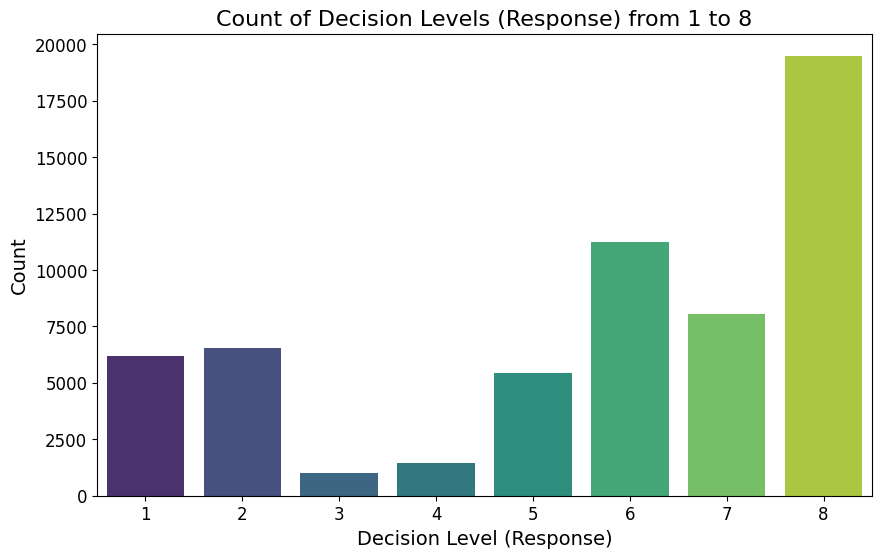

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Response 열의 카운트 값 계산
response_counts = train_df['Response'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Count of Decision Levels (Response) from 1 to 8", fontsize=16)
plt.xlabel("Decision Level (Response)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [20]:
# Response 변환 적용
train_df['Response'] = train_df['Response'].apply(lambda x: 1 if x == 1 else 0)

In [21]:
train_df['Response'].value_counts()

,count
Response,
0,53174
1,6207


In [22]:
6207/(6207+53174)

0.10452838450009262

<ipython-input-23-448896b76e0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")


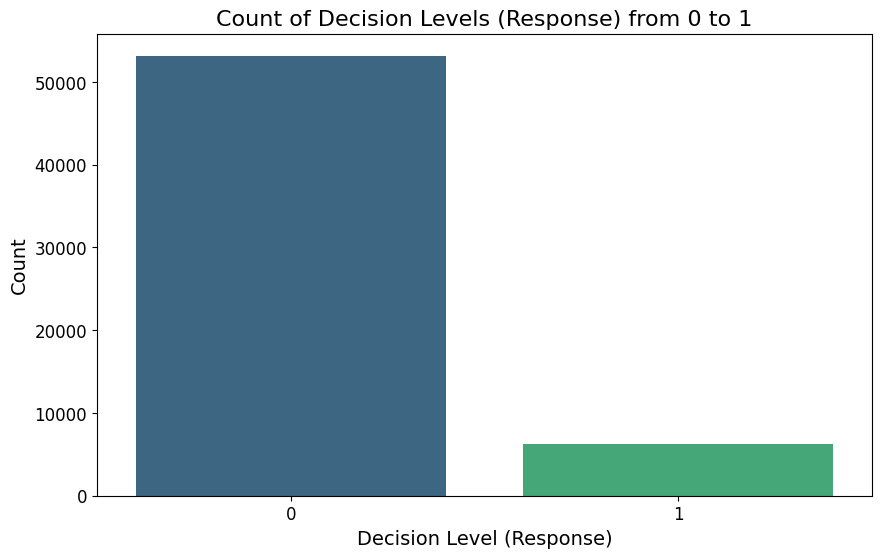

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Response 열의 카운트 값 계산
response_counts = train_df['Response'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Count of Decision Levels (Response) from 0 to 1", fontsize=16)
plt.xlabel("Decision Level (Response)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 데이터 타입 변경

데이터 타입에 대한 결정 수행이 우선 요구됨. 고유 값이 40개 이하인 경우 범주형으로 구분함. 40개 이상의 값을 가진 경우 개별 변수에 대해서 값, 분포를 보고 판단함.

In [24]:
# 명목형 변수 리스트 (categorical)
categorical_vars = [
    'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5',
    'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3',
    'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3',
    'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
    'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
    'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8',
    'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2',
    'Medical_History_3', 'Medical_History_4', 'Medical_History_5',
    'Medical_History_6', 'Medical_History_7', 'Medical_History_8',
    'Medical_History_9', 'Medical_History_11', 'Medical_History_12',
    'Medical_History_13', 'Medical_History_14', 'Medical_History_16',
    'Medical_History_17', 'Medical_History_18', 'Medical_History_19',
    'Medical_History_20', 'Medical_History_21', 'Medical_History_22',
    'Medical_History_23', 'Medical_History_25', 'Medical_History_26',
    'Medical_History_27', 'Medical_History_28', 'Medical_History_29',
    'Medical_History_30', 'Medical_History_31', 'Medical_History_33',
    'Medical_History_34', 'Medical_History_35', 'Medical_History_36',
    'Medical_History_37', 'Medical_History_38', 'Medical_History_39',
    'Medical_History_40', 'Medical_History_41'
]

# 연속형 변수 리스트 (continuous)
continuous_vars = [
    'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
    'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
    'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'
]

# 이산형 변수 리스트 (discrete)
discrete_vars = [
    'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
    'Medical_History_24', 'Medical_History_32'
]

# 더미 변수 리스트 (dummy variables)
dummy_vars = [f'Medical_Keyword_{i}' for i in range(1, 49)]


In [25]:
import pandas as pd

def convert_data_types(df, categorical_vars, continuous_vars, discrete_vars, dummy_vars):
    """
    데이터프레임의 열 타입을 지정된 변수 그룹에 따라 변환합니다.

    Parameters:
    - df (pd.DataFrame): 데이터 타입을 변환할 데이터프레임
    - categorical_vars (list): 명목형 변수 목록
    - continuous_vars (list): 연속형 변수 목록
    - discrete_vars (list): 이산형 변수 목록
    - dummy_vars (list): 더미 변수 목록 (0/1)

    Returns:
    - pd.DataFrame: 타입 변환이 완료된 데이터프레임
    """
    # 명목형 변수 변환
    if categorical_vars:
        df[categorical_vars] = df[categorical_vars].astype('category')

    # 연속형 변수 변환
    if continuous_vars:
        df[continuous_vars] = df[continuous_vars].astype('float')

    # 이산형 변수 변환
    if discrete_vars:
        df[discrete_vars] = df[discrete_vars].replace([float('inf'), float('-inf')], float('nan'))  # 무한값 처리
        df[discrete_vars] = df[discrete_vars].fillna(0).astype('float')  # NaN 처리 후 float 변환

    # 더미 변수 변환
    if dummy_vars:
        df[dummy_vars] = df[dummy_vars].astype('int32')

    # 변환 결과 반환
    return df

In [26]:
train_df = convert_data_types(train_df, categorical_vars, continuous_vars, discrete_vars, dummy_vars)

In [27]:
train_df = train_df.drop('Id', axis=1)

## 결측값 처리 및 데이터 변환

`Medical_History`, `Employment_Info`, `Insurance_History` 와 관련한 변수들은 Yeo-Johnson 변환을 수행함.

Missing data 처리는 아래 사항에 대한 판단부터 수행함.

    MCAR (Missing Completely At Random) - 완전히 무작위로 결측
    MAR (Missing At Random) - 무작위 아님
    MNAR (Missing Not At Random) - 무작위가 아님
    
MCAR의 여부는 Little's MCAR 테스트를 수행하여 알 수 있음. MAR, MNAR의 구분은 도메인 지식을 기반하여 구분하는 것이 일반적임.

데이터는 크게 아래와 같이 구분됨. 대분류 내의 변수 간에서만 Missing 여부에 상관관계가 있는 것인지 파악 필요함.

| **Variable** | **Description** |
| --- | --- |
| Id | A unique identifier associated with an application. |
| Product_Info_1-7 | A set of normalized variables relating to the product applied for |
| Ins_Age | Normalized age of applicant |
| Ht | Normalized height of applicant |
| Wt | Normalized weight of applicant |
| BMI | Normalized BMI of applicant |
| Employment_Info_1-6 | A set of normalized variables relating to the employment history of the applicant. |
| InsuredInfo_1-6 | A set of normalized variables providing information about the applicant. |
| Insurance_History_1-9 | A set of normalized variables relating to the insurance history of the applicant. |
| Family_Hist_1-5 | A set of normalized variables relating to the family history of the applicant. |
| Medical_History_1-41 | A set of normalized variables relating to the medical history of the applicant. |
| Medical_Keyword_1-48 | A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application. |
| Response | This is the target variable, an ordinal variable relating to the final decision associated with an application |

In [28]:
import pandas as pd

def missing_values_table(df, dropna=True, sort=True, ascending=False, top=None):
    """
    데이터프레임의 각 열에 대한 결측값 수와 비율을 계산하여 반환합니다.

    Parameters:
    -----------
    df : pandas.DataFrame
        분석할 데이터프레임.

    dropna : bool, default=True
        True인 경우, 결측값이 없는 열을 제외합니다.

    sort : bool, default=True
        True인 경우, 결측값 비율에 따라 내림차순으로 정렬합니다.

    ascending : bool, default=False
        sort가 True일 때, 정렬 순서를 결정합니다. False는 내림차순, True는 오름차순.

    top : int, default=None
        상위 N개의 결과만 표시합니다. None인 경우, 모든 결과를 표시합니다.

    Returns:
    --------
    missing_data : pandas.DataFrame
        각 열의 결측값 수와 비율을 포함한 데이터프레임.

    Examples:
    ---------
    >>> missing_values_table(df)
    >>> missing_values_table(df, dropna=False, sort=False)
    >>> missing_values_table(df, top=10)
    """
    # 전체 행 수 계산
    total = df.shape[0]

    # 각 열의 결측값 수 계산
    missing_counts = df.isnull().sum()

    # 각 열의 결측값 비율 계산
    missing_percent = (missing_counts / total) * 100

    # 결과를 데이터프레임으로 통합
    missing_data = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percent
    })

    # 결측값이 있는 열만 필터링 (dropna=True인 경우)
    if dropna:
        missing_data = missing_data[missing_data['Missing Count'] > 0]

    # 정렬 (sort=True인 경우)
    if sort:
        missing_data = missing_data.sort_values(by='Missing Percentage (%)', ascending=ascending)

    # 상위 N개만 표시 (top 지정한 경우)
    if top is not None:
        missing_data = missing_data.head(top)

    return missing_data


In [29]:
missing_data = missing_values_table(train_df)

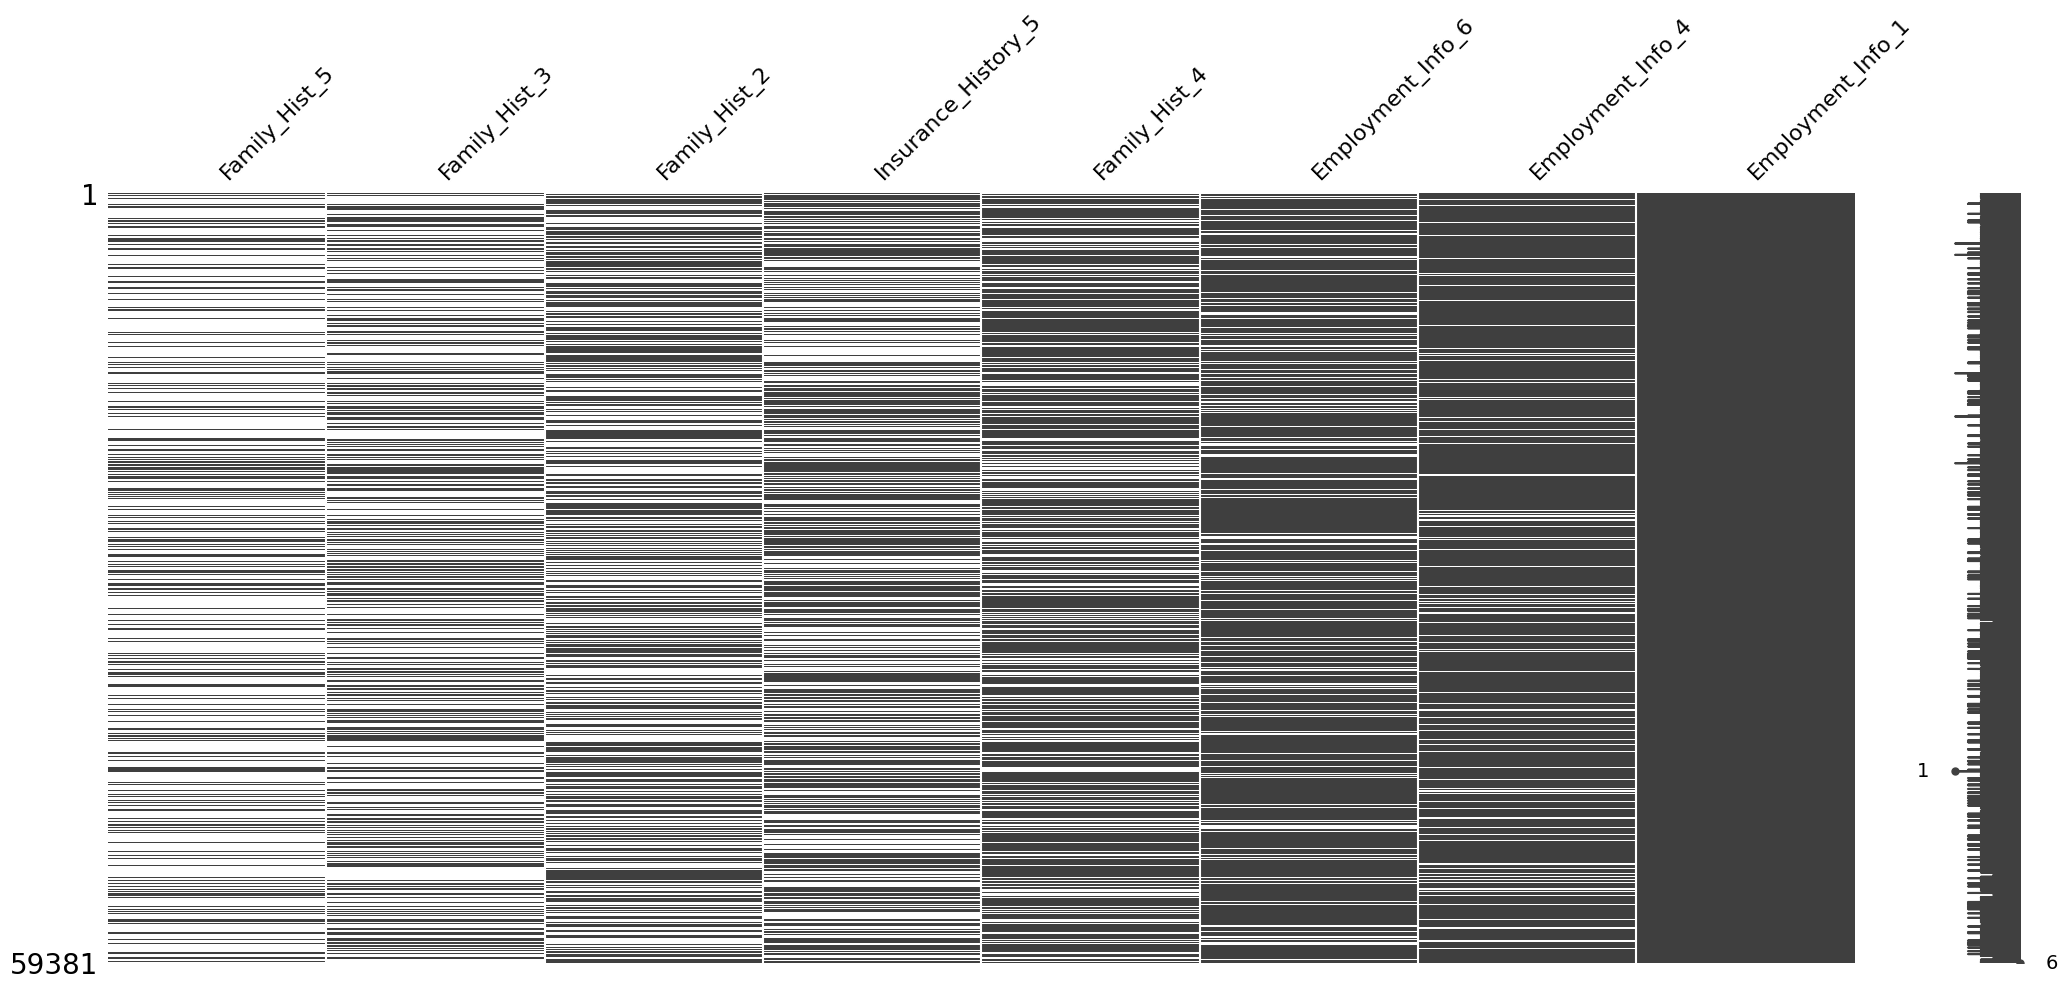

In [30]:
import missingno as msno
import matplotlib.pyplot as plt

missing_cols = missing_data.index.values

# 결측치 히트맵
msno.matrix(train_df[missing_cols])
plt.show()


Family_Hist 변수 간 Missing 에는 상관관계가 있는 것처럼 보임.

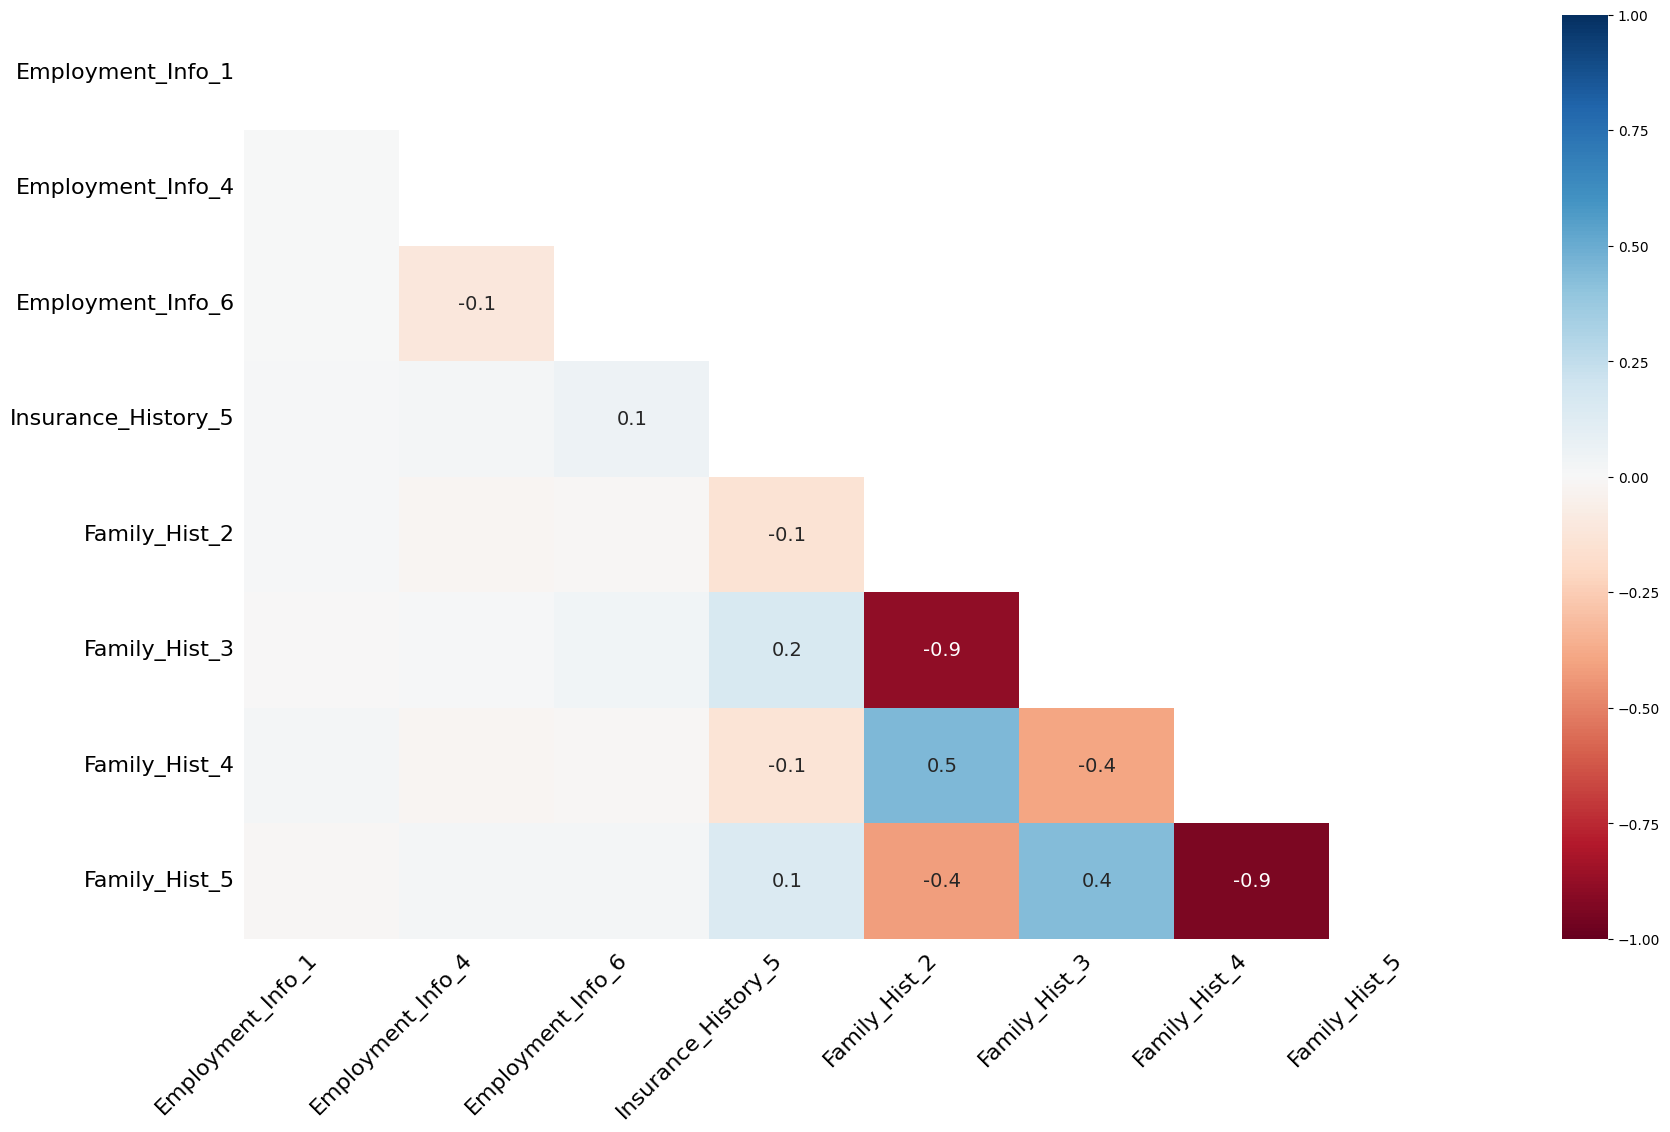

In [31]:
# 결측치 상관관계 히트맵
msno.heatmap(train_df)
plt.show()

    Employment_Info_1: 중간값 대체
    Family_Hist_1~5, Insurance_History_5, Employment_Info_4, Employment_Info_6, Medical_History_1 : MICE 대체


In [32]:
# 불필요한 열 제거
X_train_full = train_df.drop(['Response'], axis=1)
y_train = train_df['Response']

In [33]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import PowerTransformer
import sklearn

# 1. 결측치 대체를 위한 열 그룹화
knn_impute_cols = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6']
mice_impute_cols = [
    'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3',
    'Family_Hist_4', 'Family_Hist_5', 'Insurance_History_5'
]

# 2. Imputer 정의
knn_imputer = KNNImputer(n_neighbors=2)
mice_imputer = IterativeImputer(random_state=0)
# Yeo-Johnson 변환기
# yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# 3. ColumnTransformer 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_impute', knn_imputer, knn_impute_cols),
        ('mice_impute', mice_imputer, mice_impute_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False  # scikit-learn 1.2+에서 사용 가능
)

# 4. 전체 Pipeline 설정
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 5. 파이프라인을 데이터에 적용
X_train_imputed = pipeline.fit_transform(X_train_full)

# 6. 결과를 데이터프레임으로 변환
if sklearn.__version__ >= '1.2':
    feature_names = preprocessor.get_feature_names_out()
else:
    try:
        feature_names = preprocessor.get_feature_names()
    except AttributeError:
        feature_names = X_train_full.columns  # 임시로 원본 열 이름 사용

# 7. 데이터프레임으로 변환
X_train_imputed = pd.DataFrame(X_train_imputed, columns=feature_names)
# 원본 열 순서대로 재정렬
X_train_imputed = X_train_imputed[X_train_full.columns]

In [34]:
X_train_imputed = convert_data_types(X_train_imputed, categorical_vars, continuous_vars, discrete_vars, dummy_vars)

<ipython-input-25-15558396798a>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[discrete_vars] = df[discrete_vars].replace([float('inf'), float('-inf')], float('nan'))  # 무한값 처리


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output to False

# Fit the encoder on the train data and transform
encoded_train = encoder.fit_transform(X_train_imputed[categorical_vars])

# Convert encoded arrays back to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_vars))

# Add back non-categorical columns to the final DataFrame
X_train_encoded = pd.concat([X_train_imputed.reset_index(drop=True), encoded_train_df], axis=1).drop(columns=categorical_vars)

In [40]:
# Results
print("Encoded Train DataFrame:")
print(X_train_encoded.shape)


Encoded Train DataFrame:
(59381, 895)


## 모델링

In [41]:
from sklearn.model_selection import train_test_split
# 1. 데이터 분할 (훈련 세트와 검증 세트)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_encoded, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print("\n학습 세트 특징 데이터의 형태:", X_train.shape)
print("검증 세트 특징 데이터의 형태:", X_val.shape)


학습 세트 특징 데이터의 형태: (47504, 895)
검증 세트 특징 데이터의 형태: (11877, 895)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

def evaluate_model(model, X_test, y_test):
    """
    모델의 성능을 평가하고 결과를 출력합니다.

    Parameters:
    -----------
    model : sklearn 모델
        학습된 머신러닝 모델.
    X_test : pandas.DataFrame or numpy.ndarray
        테스트 세트의 특징 데이터.
    y_test : pandas.Series or numpy.ndarray
        테스트 세트의 실제 레이블.
    """
    # 예측 수행
    y_pred = model.predict(X_test)

    # Cohen's Kappa 계산
    kappa = cohen_kappa_score(y_test, y_pred)

    # 평가 결과 출력
    print(f"\nCohen's Kappa (𝜅): {kappa:.4f}")
    print("\n혼동 행렬 (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))
    print("\n분류 보고서 (Classification Report):")
    print(classification_report(y_test, y_pred))


In [43]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
def objective(trial):
    # 하이퍼파라미터 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 110)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    # 모델 초기화
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'  # 클래스 불균형을 자동으로 처리
    )

    # 모델 학습
    rf.fit(X_train, y_train_split)

    # 예측
    y_pred = rf.predict(X_val)

    # 평가 지표 선택 (예: F1-score)
    score = cross_val_score(rf, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# 스터디 생성 (TPE가 기본)
study = optuna.create_study(direction='maximize',  pruner=optuna.pruners.MedianPruner())

# 최적화 수행
study.optimize(objective, n_trials=10, timeout=600)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", study.best_params)
print("최고 정확도:", study.best_value)

[I 2025-04-04 12:47:48,488] A new study created in memory with name: no-name-86170794-bace-40fb-adce-b6ea352001eb
[I 2025-04-04 12:53:19,519] Trial 0 finished with value: 0.3498908290045144 and parameters: {'n_estimators': 892, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.3498908290045144.
[I 2025-04-04 12:56:29,578] Trial 1 finished with value: 0.30968238583747193 and parameters: {'n_estimators': 517, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.3498908290045144.
[I 2025-04-04 12:59:43,360] Trial 2 finished with value: 0.3109188674841712 and parameters: {'n_estimators': 534, 'max_depth': 108, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.3498908290045144.


최적의 하이퍼파라미터: {'n_estimators': 892, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 4}
최고 정확도: 0.3498908290045144


In [45]:
# 최적의 모델로 평가 수행
best_rf = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

best_rf.fit(X_train, y_train_split)

evaluate_model(best_rf, X_val, y_val)


Cohen's Kappa (𝜅): 0.3220

혼동 행렬 (Confusion Matrix):
[[10000   636]
 [  789   452]]

분류 보고서 (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10636
           1       0.42      0.36      0.39      1241

    accuracy                           0.88     11877
   macro avg       0.67      0.65      0.66     11877
weighted avg       0.87      0.88      0.88     11877



In [ ]:
from sklearn.linear_model import LogisticRegression

def objective(trial):
    # 하이퍼파라미터 공간 정의
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)

    # Logistic Regression 모델 초기화
    try:
        model = LogisticRegression(
            C=C,
            penalty='l1',
            solver='saga',
            class_weight='balanced',
            max_iter=1000,
            random_state=42,
            n_jobs=-1
        )
    except ValueError:
        # 일부 solver와 penalty 조합은 유효하지 않을 수 있음
        return -np.inf  # 최적화 과정에서 제외

    # 모델 학습
    model.fit(X_train, y_train_split)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 선택 (예: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# 스터디 생성 (최대화를 목표로 함)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# 최적화 수행
study.optimize(objective, n_trials=10, timeout=600)  # n_trials와 timeout은 필요에 따라 조정

[I 2025-04-04 13:01:32,384] A new study created in memory with name: no-name-f87887bb-d6db-455a-b7c3-9816f5d2f219
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
best_params = study.best_params
best_lr = LogisticRegression(
    C=best_params['C'],
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    solver='saga',
    penalty='l1'
)

# 전체 학습 데이터로 재학습 (필요에 따라)
best_lr.fit(X_train, y_train_split)

# 모델 평가
print("\n로지스틱 회귀 모델 평가:")
evaluate_model(best_lr, X_val, y_val)

In [ ]:
from sklearn.svm import LinearSVC

def objective(trial):
    # 하이퍼파라미터 공간 정의
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])

    # LinearSVC 모델 초기화
    try:
        model = LinearSVC(
            C=C,
            loss=loss,
            class_weight='balanced',
            max_iter=max_iter,
            random_state=42
        )
    except ValueError:
        # 일부 하이퍼파라미터 조합은 유효하지 않을 수 있음
        return -np.inf  # Optuna가 이 시도를 무시하게 함

    # 모델 학습
    model.fit(X_train, y_train_split)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 선택 (예: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# 스터디 생성 (최대화를 목표로 함)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# 최적화 수행
study.optimize(objective, n_trials=10, timeout=600)  # n_trials와 timeout은 필요에 따라 조정

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", study.best_params)
print("최고 Cohen's Kappa:", study.best_value)

In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
best_params = study.best_params
loss = best_params['loss']
C = best_params['C']
max_iter = best_params['max_iter']

best_svm = LinearSVC(
    C=C,
    loss=loss,
    class_weight='balanced',
    max_iter=max_iter,
    random_state=42
)

# 전체 학습 데이터로 재학습 (필요에 따라)
best_svm.fit(X_train, y_train_split)

# 모델 평가
print("\n최적화된 LinearSVC 모델 평가:")
evaluate_model(best_svm, X_val, y_val)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from optuna.integration import LightGBMPruningCallback

def objective(trial):
    # 하이퍼파라미터 공간 정의
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 10.0),
        'class_weight':'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    # LGBMClassifier 모델 초기화
    model = LGBMClassifier(**param)

    model.fit(X_train, y_train_split)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 선택 (예: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score


# 스터디 생성 (최대화를 목표로 함)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# 최적화 수행
study.optimize(objective, n_trials=100, timeout=600, gc_after_trial=True)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", study.best_params)
print("최고 Cohen's Kappa:", study.best_value)

In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
best_params = study.best_params
best_params['class_weight'] = 'balanced'
best_params['random_state'] = 42
best_params['n_jobs'] = -1

best_lgbm = LGBMClassifier(**best_params)

# 전체 학습 데이터로 재학습
best_lgbm.fit(X_train, y_train_split)

In [ ]:
# 모델 평가
print("\n최적화된 LGBMClassifier 모델 평가:")
evaluate_model(best_lgbm, X_val, y_val)

In [ ]:
import joblib

# 1. 모델들을 딕셔너리에 저장
models = {
    'best_svm': best_svm,
    'best_lgbm': best_lgbm,
    'best_lr': best_lr,
    'best_rf': best_rf
}

# 2. 각 모델을 반복적으로 저장
for name, model in models.items():
    filename = f'{name}.pkl'  # 파일명 설정
    joblib.dump(model, filename)  # 모델 저장
    print(f'{filename} 저장 완료')


## Shapley Value

In [ ]:
import shap

# TreeExplainer 생성
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_val)

In [ ]:
# 이진 분류의 경우, 양성 클래스의 SHAP 값만 선택
shap_values_positive = shap_values[1]

In [ ]:
# SHAP 초기화 (Jupyter Notebook 사용 시)
shap.initjs()

# Summary Plot (Dot)
shap.summary_plot(shap_values_positive, X_val, plot_type="dot", max_display=10)

In [ ]:
# Summary Plot (Bar)
shap.summary_plot(shap_values_positive, X_val, plot_type="bar", max_display=10)

In [ ]:
shap_values_positive

In [ ]:
X_val['Ins_Age']

In [ ]:
# Dependence Plot 예시
shap.dependence_plot('Ins_Age', shap_values_positive, X_val, interaction_index=None)

In [ ]:
# Waterfall Plot 예시 (첫 번째 인스턴스)
shap.waterfall_plot(shap.Explanation(values=shap_values_positive[0],
                                     base_values=explainer.expected_value[1],
                                     data=X_val.iloc[0]))

# 플롯 표시
plt.show()